In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
# Set global visualization style

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [6]:
# Load Dataset

metadata = '/Users/himanipatel/Desktop/data/metadata.csv'

In [7]:
df = pd.read_csv(metadata)

/var/folders/gv/qpzxj6gd7dz52h9b_p6h8wbr0000gn/T/ipykernel_9841/1468515314.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(metadata)


In [8]:
# View basic structure

df.shape

(1056660, 19)

In [9]:
# Look at the data

df.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [10]:
# Summary statistics

df.describe(include='all')


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
count,1056660,373766,1056660,1056157,656780,389571,498932.0,1056660,821118,1054846,1032791,969338,0.0,482935,14249.00000,373766,315742,686934,9.764680e+05
unique,970836,373719,49,850366,655525,389571,498587.0,18,730713,8056,796659,54993,NaN,482935,14249.00000,373719,315742,686934,NaN
top,kgpo6psq,31bc0fb718edaab9e33f678909710f62c40abebc,WHO,Reply,10.1016/j.scitotenv.2020.139397,PMC35282,35087663.0,unk,[Figure: see text].,2021,"Anonymous,",PLoS One,NaN,#covidwho-1638294,2110.00181,document_parses/pdf_json/31bc0fb718edaab9e33f6...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
freq,192,3,450459,251,9,1,5.0,601506,206,233709,3904,9953,NaN,1,1.00000,3,1,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.175871e+08
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.312281e+07
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.600000e+01
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.211411e+08
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.320829e+08
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.373948e+08


In [11]:
# Missing values

df.isnull().sum()

cord_uid                  0
sha                  682894
source_x                  0
title                   503
doi                  399880
pmcid                667089
pubmed_id            557728
license                   0
abstract             235542
publish_time           1814
authors               23869
journal               87322
mag_id              1056660
who_covidence_id     573725
arxiv_id            1042411
pdf_json_files       682894
pmc_json_files       740918
url                  369726
s2_id                 80192
dtype: int64

In [12]:
# Data types

df.dtypes

cord_uid             object
sha                  object
source_x             object
title                object
doi                  object
pmcid                object
pubmed_id            object
license              object
abstract             object
publish_time         object
authors              object
journal              object
mag_id              float64
who_covidence_id     object
arxiv_id             object
pdf_json_files       object
pmc_json_files       object
url                  object
s2_id               float64
dtype: object

In [13]:
# Convert publish_time to datetime

df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

In [14]:
# Drop columns that are mostly missing 

missing_ratio = df.isnull().mean()
columns_to_drop = missing_ratio[missing_ratio > 0.8].index
df_cleaned = df.drop(columns=columns_to_drop)
print(f"Dropped columns: {list(columns_to_drop)}")


Dropped columns: ['mag_id', 'arxiv_id']


In [15]:
# Fill or drop missing rows

df_cleaned['abstract'] = df_cleaned['abstract'].fillna("No abstract available")
df_cleaned = df_cleaned.dropna(subset=['title', 'publish_time']) 


In [16]:
df_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054343 entries, 0 to 1056659
Data columns (total 17 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   cord_uid          1054343 non-null  object        
 1   sha               373762 non-null   object        
 2   source_x          1054343 non-null  object        
 3   title             1054343 non-null  object        
 4   doi               655180 non-null   object        
 5   pmcid             389562 non-null   object        
 6   pubmed_id         498432 non-null   object        
 7   license           1054343 non-null  object        
 8   abstract          1054343 non-null  object        
 9   publish_time      1054343 non-null  datetime64[ns]
 10  authors           1030559 non-null  object        
 11  journal           968693 non-null   object        
 12  who_covidence_id  481119 non-null   object        
 13  pdf_json_files    373762 non-null   object

In [23]:
# Create a new column for year-month

df_cleaned['year_month'] = df_cleaned['publish_time'].dt.to_period('M')

In [24]:
# Group by month and count papers

papers_by_month = df_cleaned.groupby('year_month').size()

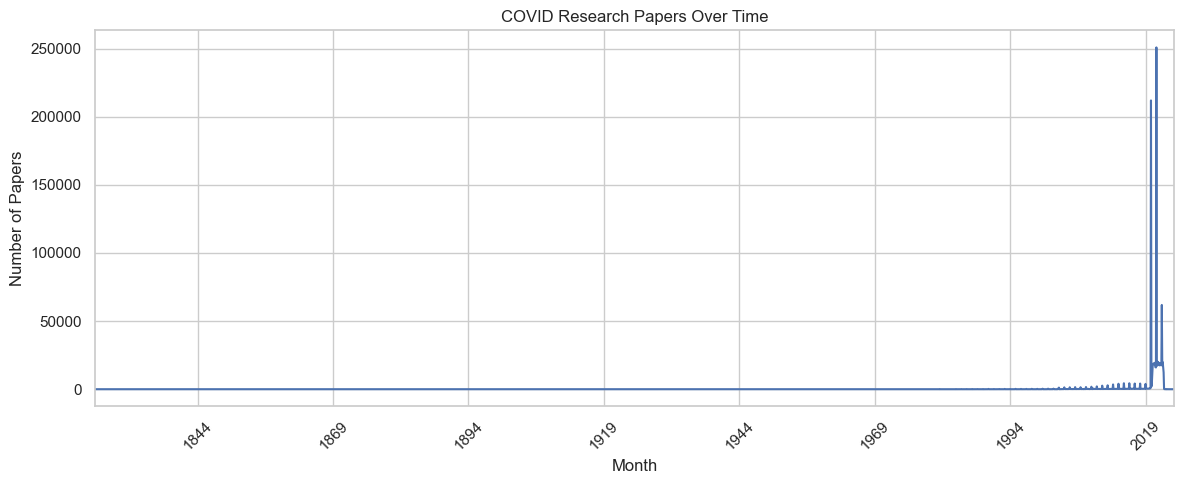

In [25]:
# Plotting

papers_by_month.plot(kind='line', figsize=(12, 5), title='COVID Research Papers Over Time')
plt.ylabel('Number of Papers')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# Keep only records published after 2015

df_cleaned = df_cleaned[df_cleaned['publish_time'].dt.year >= 2015]

In [27]:
# Recreate 'year_month' and plot again

df_cleaned['year_month'] = df_cleaned['publish_time'].dt.to_period('M')
papers_by_month = df_cleaned.groupby('year_month').size()


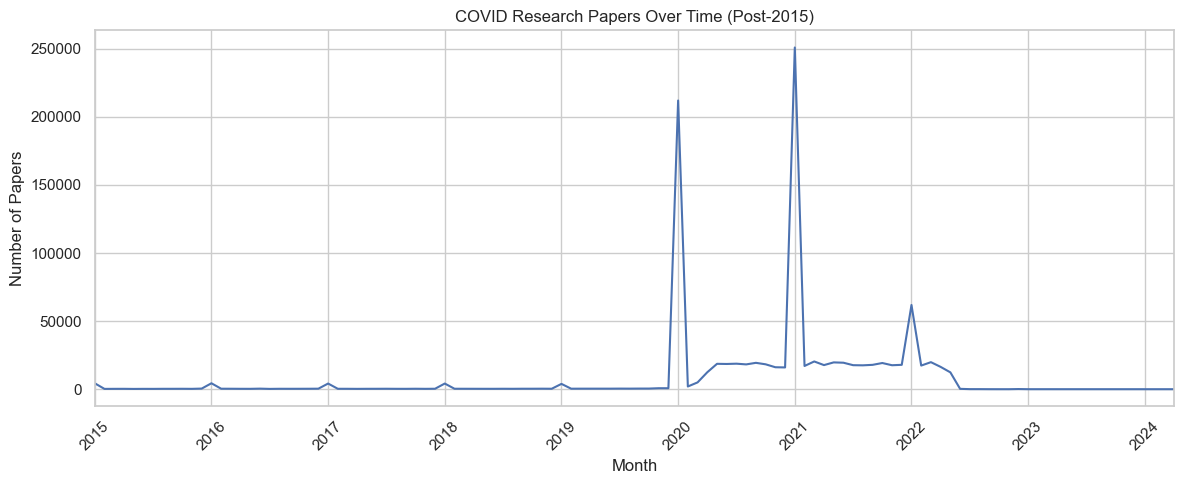

In [28]:
# Plotting

papers_by_month.plot(kind='line', figsize=(12, 5), title='COVID Research Papers Over Time (Post-2015)')
plt.ylabel('Number of Papers')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
# Fill missing abstracts

df_cleaned['abstract'] = df_cleaned['abstract'].fillna("")


In [31]:
# Limit to abstracts with enough content

df_abstracts = df_cleaned[df_cleaned['abstract'].str.len() > 100]


In [32]:
# TF-IDF vectorization

vectorizer = TfidfVectorizer(
    max_df=0.95,
    min_df=5,
    stop_words='english',
    max_features=1000
)
tfidf = vectorizer.fit_transform(df_abstracts['abstract'])


In [33]:
from sklearn.decomposition import NMF

In [34]:
# Choose number of topics

n_topics = 6

nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_topics = nmf_model.fit_transform(tfidf)


In [35]:
# Show top words per topic

feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(nmf_model.components_):
    print(f"\nTopic #{topic_idx+1}:")
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    print(", ".join(top_words))



Topic #1:
covid, 19, pandemic, disease, cases, coronavirus, 2020, 2019, infection, case

Topic #2:
cov, sars, infection, viral, virus, respiratory, coronavirus, protein, cells, syndrome

Topic #3:
patients, treatment, clinical, patient, care, hospital, disease, cancer, severe, mortality

Topic #4:
learning, model, students, data, based, research, using, online, used, study

Topic #5:
95, ci, risk, study, age, associated, group, years, higher, mortality

Topic #6:
health, care, pandemic, social, mental, public, services, healthcare, people, anxiety


In [36]:
# Assign dominant topic

df_abstracts = df_abstracts.copy()  
df_abstracts['dominant_topic'] = np.argmax(nmf_topics, axis=1)

In [37]:
topic_labels = {
    0: 'Epidemiology',
    1: 'Vaccines',
    2: 'Clinical Studies',
    3: 'Diagnostics',
    4: 'Public Health',
    5: 'Virology',
}
df_abstracts['topic_label'] = df_abstracts['dominant_topic'].map(topic_labels)


In [38]:
# Convert publish_time to datetime

df_abstracts['publish_time'] = pd.to_datetime(df_abstracts['publish_time'])
df_abstracts['year_month'] = df_abstracts['publish_time'].dt.to_period('M')

In [39]:
# Count topic appearances per month

topic_trend = df_abstracts.groupby(['year_month', 'topic_label']).size().unstack(fill_value=0)


In [40]:
# Convert year_month back to datetime for plotting

topic_trend.index = topic_trend.index.to_timestamp()

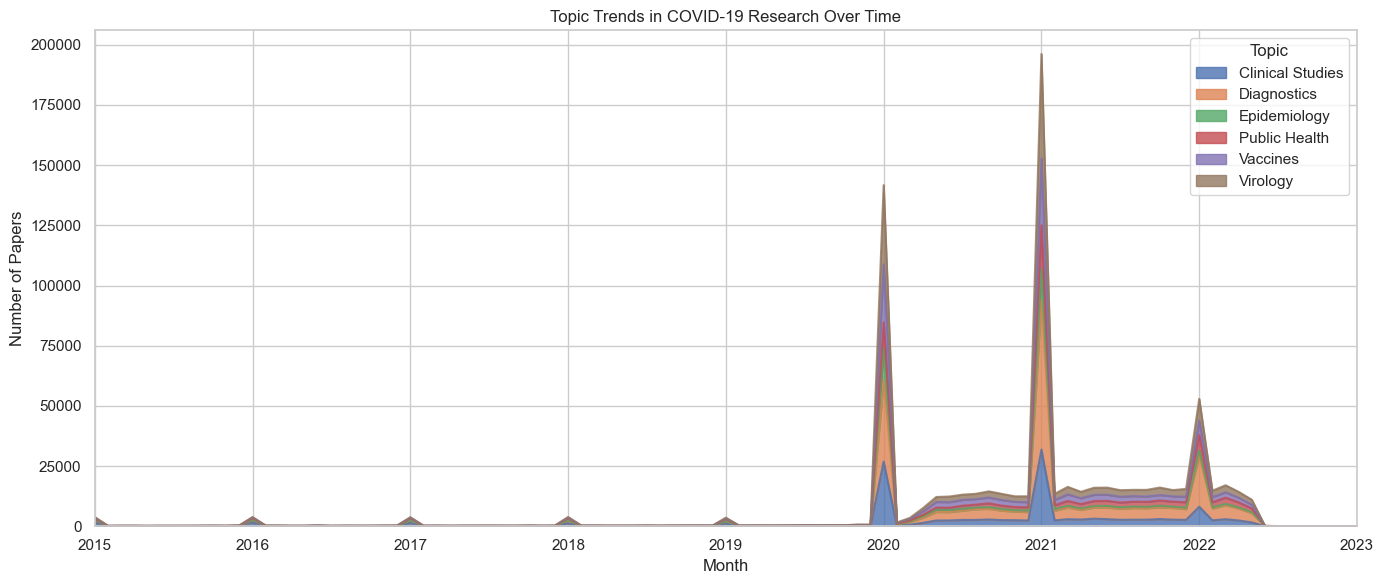

In [41]:
# Plotting

topic_trend.plot(kind='area', stacked=True, figsize=(14, 6), alpha=0.8)
plt.title('Topic Trends in COVID-19 Research Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Papers')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()


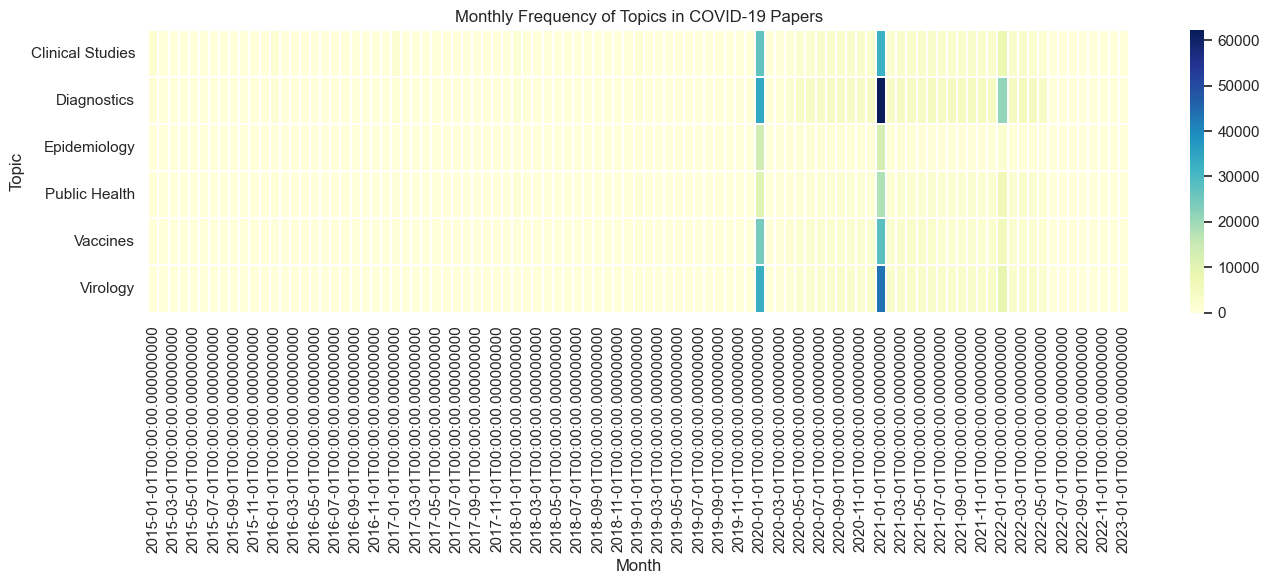

In [42]:
# Set up the plot

plt.figure(figsize=(14, 6))
sns.heatmap(topic_trend.T, cmap='YlGnBu', linewidths=0.3)

plt.title('Monthly Frequency of Topics in COVID-19 Papers')
plt.xlabel('Month')
plt.ylabel('Topic')
plt.tight_layout()
plt.show()


Summary:

Using topic modeling and current analysis this project studied the growth and trends in COVID-19 research papers.   We used a cleaned version of the CORD-19 dataset to show how the outbreak caused a global rise in scientific interest. Early 2020 and early 2021 had large rises in the time distribution of papers which matched with the outbreaks start and the subsequent international reaction.  

We found six key subjects using TF-IDF vectorization and NMF: Virology, Public Health, Diagnostics, Epidemiology, and Clinical Studies. How these topics changed over time was shown via the set area chart. For example, the global change from studying the virus to treating and avoiding it can be seen in the initial pace obtained by virus and the epidemiology, and the somewhat later peak of vaccines and clinical studies.

Another level of understanding was given by the heatmap which showed how frequently each topic took place over time. It showed how some field like diagnostics saw a lot of research activity but it was brief while others like public health remained more relevant across several months.

In the conclusion, this analysis showed the value of topic modeling for large textual data in addition to revealing subject patterns in the COVID-19 research the natural world.   During global health emergencies this kind of inquiry can alert policy makers and scholars to gaps in the literature and changing scientific goals.